### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [22]:
## Import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

london_bike = pd.read_csv("C:/Users/Tamás/Desktop/ESMT/FirstSem/AnalyticsThroughCoding/Analytics-through-coding-in-class/Data/london_bikes.csv")

In [23]:
london_bike.info()
london_bike.columns
london_bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4934 non-null   object 
 1   bikes_hired    4934 non-null   int64  
 2   year           4934 non-null   int64  
 3   wday           4934 non-null   object 
 4   month          4934 non-null   object 
 5   week           4934 non-null   int64  
 6   cloud_cover    4901 non-null   float64
 7   humidity       4851 non-null   float64
 8   pressure       4903 non-null   float64
 9   radiation      4894 non-null   float64
 10  precipitation  4903 non-null   float64
 11  snow_depth     4632 non-null   float64
 12  sunshine       4903 non-null   float64
 13  mean_temp      4903 non-null   float64
 14  min_temp       4872 non-null   float64
 15  max_temp       4903 non-null   float64
 16  weekend        4934 non-null   bool   
dtypes: bool(1), float64(10), int64(3), object(3)
memory 

,bikes_hired,year,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp
count,4934.000000,4934.000000,4934.000000,4901.000000,4851.000000,4903.000000,4894.000000,4903.000000,4632.000000,4903.000000,4903.000000,4872.000000,4903.000000
mean,26448.565869,2016.823470,26.896230,4.917568,75.710369,10153.096879,118.182060,17.354477,0.015112,41.231695,12.051703,8.060714,16.056680
std,9677.635260,3.910234,15.157628,2.368445,11.234117,105.267258,89.453589,38.243881,0.234630,38.966050,5.721325,5.266205,6.613207
min,0.000000,2010.000000,1.000000,0.000000,33.000000,9668.000000,2.000000,0.000000,0.000000,0.000000,-4.100000,-9.400000,-1.200000
25%,19604.000000,2013.000000,14.000000,3.000000,68.000000,10091.000000,40.000000,0.000000,0.000000,5.000000,7.700000,4.200000,11.000000
50%,26129.000000,2017.000000,27.000000,5.000000,77.000000,10162.000000,93.500000,0.000000,0.000000,32.000000,11.900000,8.250000,15.700000
75%,33233.750000,2020.000000,40.000000,7.000000,84.000000,10224.000000,186.000000,18.000000,0.000000,67.000000,16.600000,12.200000,21.000000
max,73094.000000,2024.000000,53.000000,9.000000,100.000000,10477.000000,402.000000,516.000000,7.000000,147.000000,30.900000,22.300000,40.200000


**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [24]:
## Your code goes here

# Check for the sum of the missing values in each column
london_bike.isnull().sum()

date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64

In [25]:
# Making a copy from the original dataset
london_bike_copy = london_bike.copy()

In [26]:
# Changing the datatime in a correct format
london_bike_copy["date"] = pd.to_datetime(london_bike_copy["date"])

In [27]:
# Changing the format of the "month" and "wday" columns to integer with mapping
months_to_int = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
london_bike_copy.loc[:, "month"] = london_bike_copy["month"].map(months_to_int)

days_to_int = {
    'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7
}
london_bike_copy.loc[:, "wday"] = london_bike_copy["wday"].map(days_to_int)

In [28]:
# Convert 'month' and 'wday' columns to integer type
london_bike_copy["month"] = london_bike_copy["month"].astype(int)
london_bike_copy["wday"] = london_bike_copy["wday"].astype(int)

In [29]:
# Finding columns with missing values
missing_columns = london_bike_copy.columns[london_bike_copy.isnull().any()]

missing_values = pd.DataFrame()
for col in missing_columns:
     missing_values[col] = london_bike_copy[col].describe()

missing_values = missing_values.T
display(missing_values)

,count,mean,std,min,25%,50%,75%,max
cloud_cover,4901.0,4.917568,2.368445,0.0,3.0,5.00,7.0,9.0
humidity,4851.0,75.710369,11.234117,33.0,68.0,77.00,84.0,100.0
pressure,4903.0,10153.096879,105.267258,9668.0,10091.0,10162.00,10224.0,10477.0
radiation,4894.0,118.182060,89.453589,2.0,40.0,93.50,186.0,402.0
precipitation,4903.0,17.354477,38.243881,0.0,0.0,0.00,18.0,516.0
snow_depth,4632.0,0.015112,0.234630,0.0,0.0,0.00,0.0,7.0
sunshine,4903.0,41.231695,38.966050,0.0,5.0,32.00,67.0,147.0
mean_temp,4903.0,12.051703,5.721325,-4.1,7.7,11.90,16.6,30.9
min_temp,4872.0,8.060714,5.266205,-9.4,4.2,8.25,12.2,22.3
max_temp,4903.0,16.056680,6.613207,-1.2,11.0,15.70,21.0,40.2


In [30]:
# Filling the missing values in each column 

# CLOUD_COVER - the values are between 0 and 9, the mean is 4.91 and the standard deviation is 2.36, so most of the values are close to the mean. 
# We can fill the missing values with the mean of the column
london_bike_copy["cloud_cover"].fillna(london_bike_copy["cloud_cover"].mean(), inplace=True)

# HUMIDITY - here the range between the min and max value is quite bigger than the previous one as the standard deviation, but the fact that from the
# 4934 row only 83 have missing value, we can use the mean of the columns to fill the missing values.
london_bike_copy["humidity"].fillna(london_bike_copy["humidity"].mean(), inplace=True)

# PRESSURE, RADIATION, MEAN_TEMP, MIN_TEMP, MAX_TEMP - the same situation like at the HUMIDITY. We can fill the missing values with the mean of the column.
london_bike_copy["pressure"].fillna(london_bike_copy["pressure"].mean(), inplace = True)
london_bike_copy["radiation"].fillna(london_bike_copy["radiation"].mean(), inplace = True)
london_bike_copy["mean_temp"].fillna(london_bike_copy["mean_temp"].mean(), inplace = True)
london_bike_copy["min_temp"].fillna(london_bike_copy["min_temp"].mean(), inplace = True)
london_bike_copy["max_temp"].fillna(london_bike_copy["max_temp"].mean(), inplace = True)

# PRECIPITATION, SUNSHINE - Every cell in the row, which should contain numerical data has missing value, 
# there is no option to  compare, so we have to fill these cells with the mean of the column.
london_bike_copy["precipitation"].fillna(london_bike_copy["precipitation"].mean(), inplace = True)
london_bike_copy["sunshine"].fillna(london_bike_copy["sunshine"].mean(), inplace = True)

# SNOW_DEPTH - where the missing values are, these are no winter months, so there were no snow, we can replace the missing values with 0.
london_bike_copy["snow_depth"].fillna(0, inplace = True)

C:\Users\Tamás\AppData\Local\Temp\ipykernel_18408\2233671428.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  london_bike_copy["cloud_cover"].fillna(london_bike_copy["cloud_cover"].mean(), inplace=True)
C:\Users\Tamás\AppData\Local\Temp\ipykernel_18408\2233671428.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [31]:
# Create a new 'season' column based on 'month'
months_to_season = [
    london_bike_copy["month"].isin([3, 4, 5]),      # Spring
    london_bike_copy["month"].isin([6, 7, 8]),      # Summer
    london_bike_copy["month"].isin([9, 10, 11]),    # Fall
    london_bike_copy["month"].isin([12, 1, 2])      # Winter
]
options = [1, 2, 3, 4]
london_bike_copy["season"] = np.select(months_to_season, options)

**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



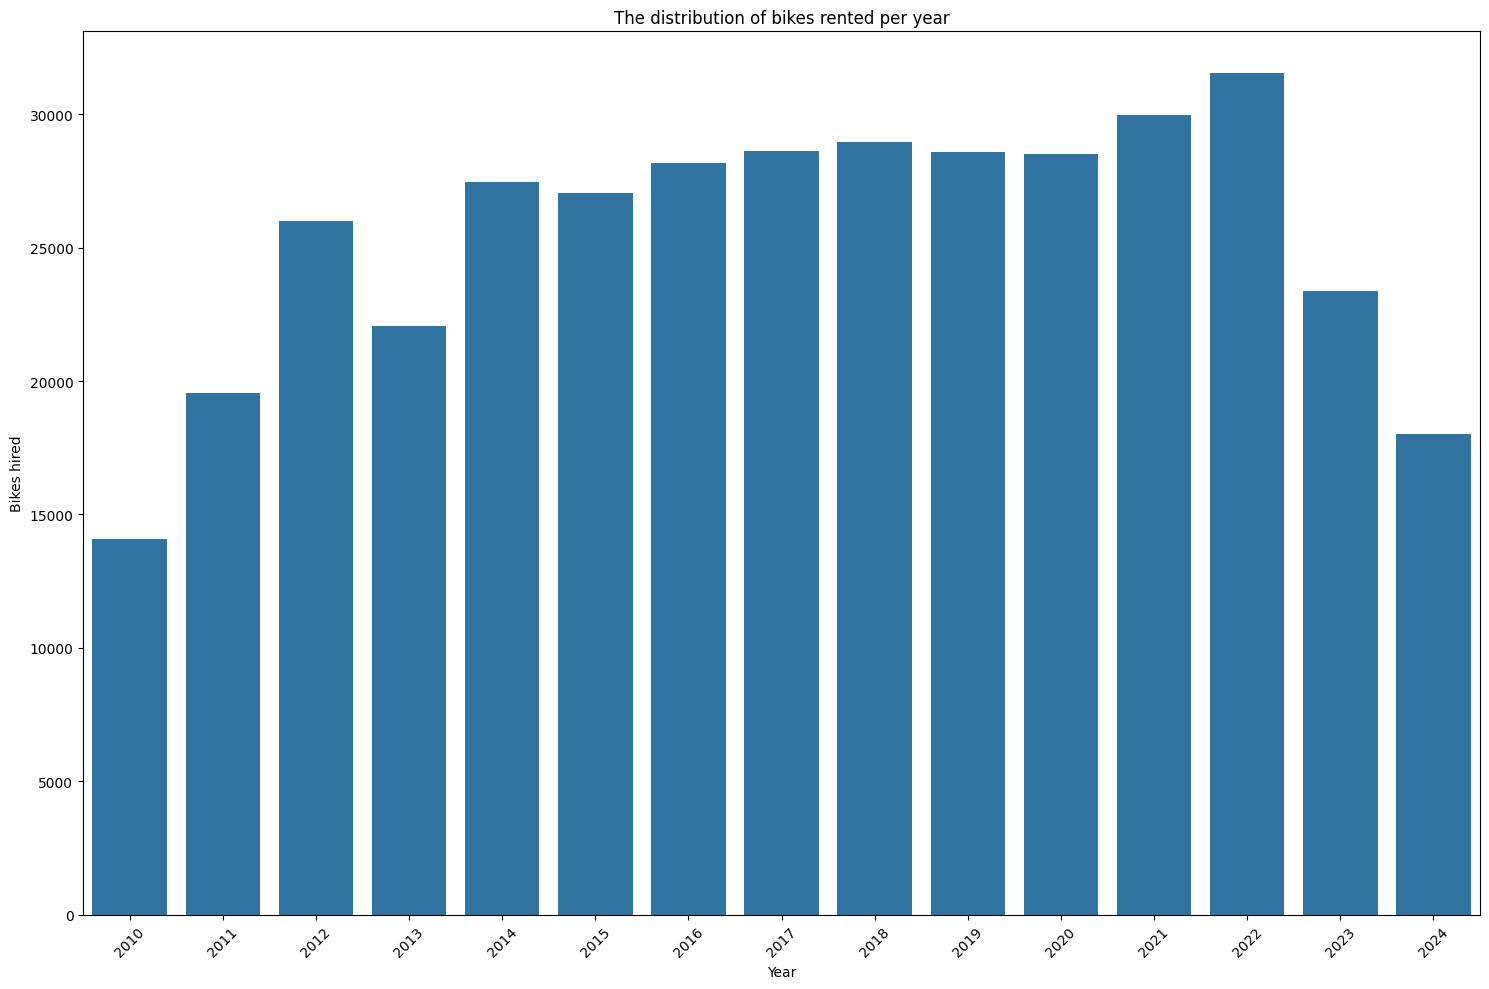

In [32]:
# The distribution of bikes rented per year
plt.figure(figsize=(15, 10))
sns.barplot(data=london_bike_copy, x = "year", y = "bikes_hired", errorbar = None)
plt.title("The distribution of bikes rented per year")
plt.xlabel("Year") 
plt.ylabel("Bikes hired")
plt.xticks(rotation = 45)   
plt.tight_layout()
plt.show()

C:\Users\Tamás\AppData\Local\Temp\ipykernel_18408\4291240105.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([season_labels[s] for s in sorted(season_labels.keys())])


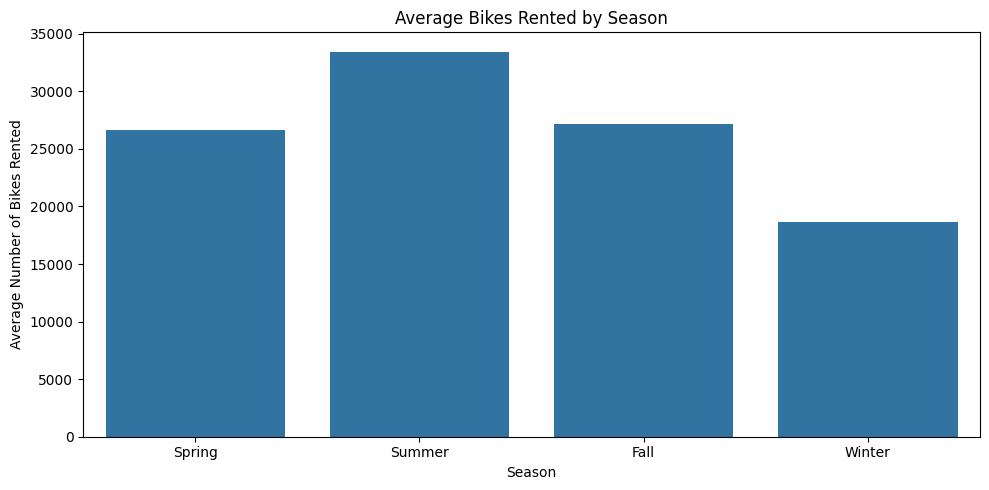

C:\Users\Tamás\AppData\Local\Temp\ipykernel_18408\4291240105.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])


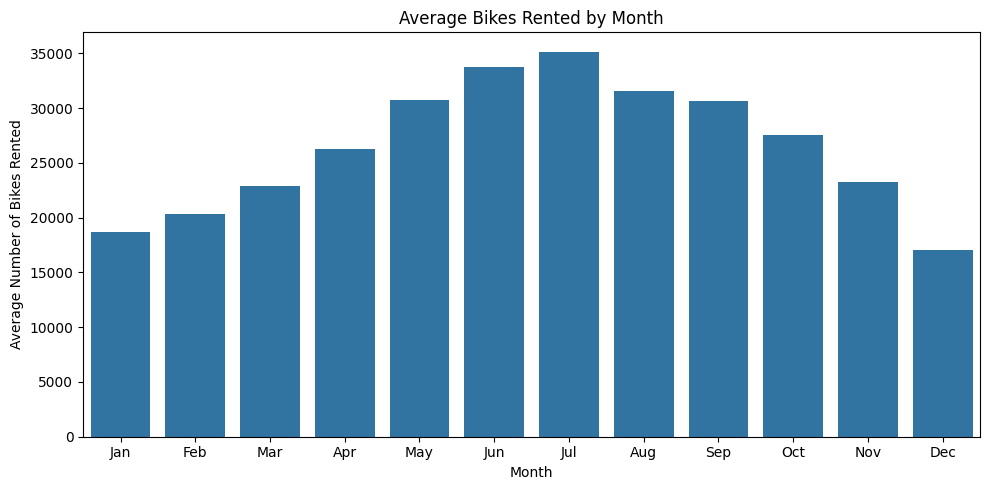

In [33]:
# The variaty of rented bikes by season and month.

# Season names mapping
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
# Month names mapping (ordered by month number)
month_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

# Average bikes rented by season
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=london_bike_copy, x="season", y="bikes_hired", estimator="mean", errorbar = None)
ax.set_title("Average Bikes Rented by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Average Number of Bikes Rented")
ax.set_xticklabels([season_labels[s] for s in sorted(season_labels.keys())])
plt.tight_layout()
plt.show()

# Average bikes rented by month
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=london_bike_copy, x="month", y="bikes_hired", estimator="mean", errorbar = None)
ax.set_title("Average Bikes Rented by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Number of Bikes Rented")
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.tight_layout()
plt.show()

# Caption:
# These barplots show the average number of bikes rented by season and by month. Summer months and seasons have the highest average rentals, while winter months have the lowest.

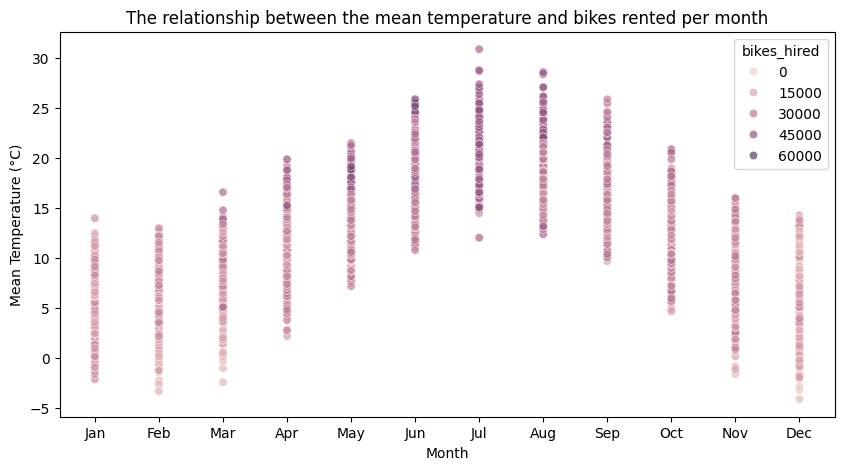

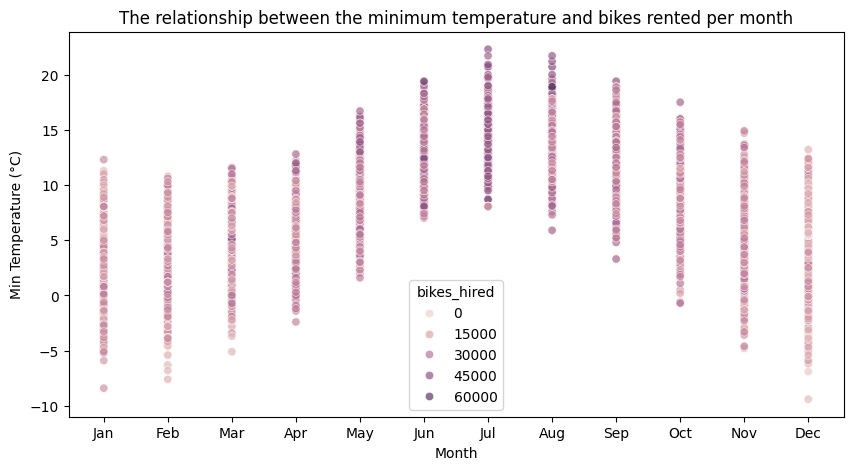

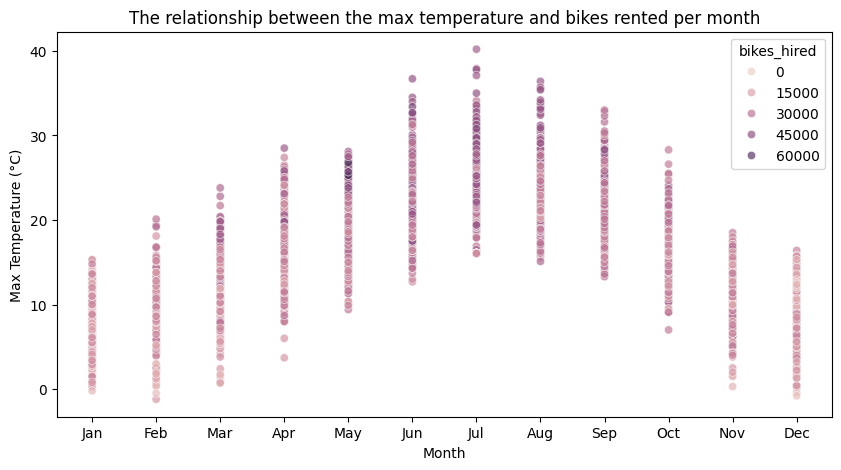

In [34]:
# The relationship between temperature and bikes rented

# Month names mapping (ordered by month number)
month_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="mean_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the mean temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Mean Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  # Ensure all months are shown
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="min_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the minimum temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Min Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data = london_bike_copy, x="month", y="max_temp", hue="bikes_hired", alpha=0.7, sizes=(50, 200))
ax.set_title('The relationship between the max temperature and bikes rented per month')
ax.set_xlabel('Month') 
ax.set_ylabel('Max Temperature (°C)')
ax.set_xticks(np.arange(1, 13))  
ax.set_xticklabels([month_labels[m] for m in sorted(month_labels.keys())])
plt.show()

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [35]:
# Confidence Interval for the mean number of bikes rented per season using the formula mean +- t_critical * Standard Error (SE)
from scipy import stats

#Group by season and calculate statistics
seasons_ci = (
    london_bike_copy
    .groupby("season")
    .agg(
        mean_bikes_hired = ("bikes_hired", "mean"),
        median_bikes_hired = ("bikes_hired", "median"),
        std_bikes_hired = ("bikes_hired", "std"),
        count_bikes_hired = ("bikes_hired", "count")
    )
    .reset_index()
)

# Calculate additional statistics for confidence intervals
seasons_ci["t_critical"] = seasons_ci["count_bikes_hired"].apply(lambda n: stats.t.ppf(0.975, df=n-1))  # t-critical value for 95% CI
seasons_ci["se_rating"] = seasons_ci["std_bikes_hired"] / np.sqrt(seasons_ci["count_bikes_hired"])  # Standard Error
seasons_ci["margin_of_error"] = seasons_ci["t_critical"] * seasons_ci["se_rating"]  # Margin of Error
seasons_ci["rating_low"] = seasons_ci["mean_bikes_hired"] - seasons_ci["margin_of_error"]  # Lower bound of CI
seasons_ci["rating_high"] = seasons_ci["mean_bikes_hired"] + seasons_ci["margin_of_error"]  # Upper bound of CI

# Sort by mean bikes hired in descending order
seasons_ci = seasons_ci.sort_values(by="mean_bikes_hired", ascending=False)

# Display the results
seasons_ci

,season,mean_bikes_hired,median_bikes_hired,std_bikes_hired,count_bikes_hired,t_critical,se_rating,margin_of_error,rating_low,rating_high
1,2,33455.454841,34524.0,9147.748858,1229,1.961898,260.938578,511.934790,32943.520052,33967.389631
2,3,27136.845369,27381.0,7857.506100,1274,1.961829,220.140533,431.878137,26704.967232,27568.723506
0,1,26609.178930,26469.0,8660.272182,1196,1.961951,250.418236,491.308340,26117.870590,27100.487270
3,4,18610.162753,18802.0,6625.762758,1235,1.961888,188.539522,369.893476,18240.269277,18980.056229


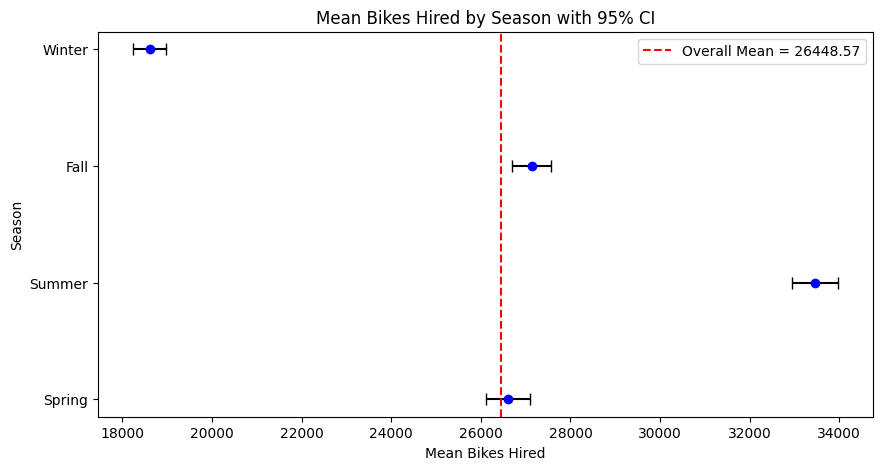

In [36]:
import matplotlib.pyplot as plt

# Visualization of the confidence intervals
plt.figure(figsize = (10, 5))

# Integer to season names
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Errorbar plot: mean ± margin of error
plt.errorbar(
    x = seasons_ci["mean_bikes_hired"],
    y = seasons_ci["season"],
    xerr = seasons_ci["margin_of_error"],
    fmt = "o", color="blue", ecolor="black", capsize=4
)

# Draw overall mean line
overall_mean = london_bike_copy["bikes_hired"].mean()
plt.axvline(overall_mean, color = "red", linestyle = "--", label = f"Overall Mean = {overall_mean:.2f}")
plt.yticks(ticks=[1, 2, 3, 4], labels=[season_labels[s] for s in [1, 2, 3, 4]])
plt.xlabel("Mean Bikes Hired")
plt.ylabel("Season")
plt.title("Mean Bikes Hired by Season with 95% CI")
plt.legend()

plt.show()


At summer was the peak period about the hired bikes (around 34 000 bikes (the means bikes hired for the all days in the summmer)), while the season when the least bikes were hired was winter. At spring and fall the people hired almost the same number of bikes in average, but the numbers are much lower than summer, instead they are approaching to the overall mean.

In [37]:
# Confidence Interval for the mean number of bikes rented per month using the formula mean +- t_critical * Standard Error (SE)
from scipy import stats

#Group by season and calculate statistics
months_ci = (
    london_bike_copy
    .groupby("month")
    .agg(
        mean_bikes_hired = ("bikes_hired", "mean"),
        median_bikes_hired = ("bikes_hired", "median"),
        std_bikes_hired = ("bikes_hired", "std"),
        count_bikes_hired = ("bikes_hired", "count")
    )
    .reset_index()
)

# Calculate additional statistics for confidence intervals
months_ci["t_critical"] = months_ci["count_bikes_hired"].apply(lambda n: stats.t.ppf(0.975, df=n-1))  # t-critical value for 95% CI
months_ci["se_rating"] = months_ci["std_bikes_hired"] / np.sqrt(months_ci["count_bikes_hired"])  # Standard Error
months_ci["margin_of_error"] = months_ci["t_critical"] * months_ci["se_rating"]  # Margin of Error
months_ci["rating_low"] = months_ci["mean_bikes_hired"] - months_ci["margin_of_error"]  # Lower bound of CI
months_ci["rating_high"] = months_ci["mean_bikes_hired"] + months_ci["margin_of_error"]  # Upper bound of CI

# Sort by mean bikes hired in descending order
months_ci = months_ci.sort_values(by="mean_bikes_hired", ascending=False)

# Display the results
months_ci

,month,mean_bikes_hired,median_bikes_hired,std_bikes_hired,count_bikes_hired,t_critical,se_rating,margin_of_error,rating_low,rating_high
6,7,35160.679012,36932.0,8371.380378,405,1.965853,415.977235,817.750210,34342.928802,35978.429223
5,6,33744.102564,33851.0,8765.336470,390,1.966081,443.850065,872.645209,32871.457355,34616.747773
7,8,31604.790323,33293.0,9832.833248,434,1.965458,471.991100,927.678568,30677.111754,32532.468891
4,5,30722.198511,30426.0,8561.905067,403,1.965883,426.498870,838.446734,29883.751777,31560.645245
8,9,30647.840476,31803.5,8260.433461,420,1.965642,403.067881,792.287092,29855.553385,31440.127568
9,10,27510.831797,27999.5,6896.999490,434,1.965458,331.066570,650.697358,26860.134440,28161.529155
3,4,26242.038462,26211.0,7775.298629,390,1.966081,393.717551,774.080621,25467.957841,27016.119082
10,11,23239.397619,23667.0,6516.006115,420,1.965642,317.948542,624.972958,22614.424661,23864.370577
2,3,22851.456576,23390.0,7739.305269,403,1.965883,385.522256,757.891518,22093.565058,23609.348094
1,2,20370.174387,20713.0,6528.789817,367,1.966467,340.800054,670.171966,19700.002421,21040.346353


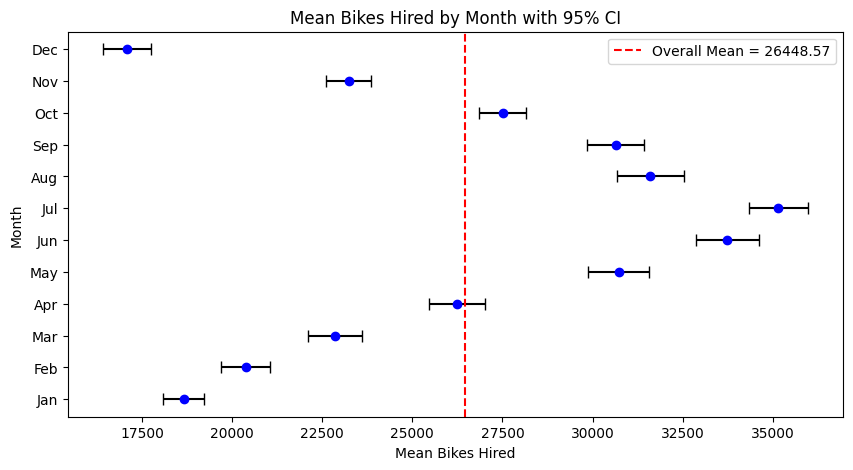

In [38]:
import matplotlib.pyplot as plt

# Visualization of the confidence intervals
plt.figure(figsize = (10, 5))

# Integer to months names
months_labels = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

# Errorbar plot: mean ± margin of error
plt.errorbar(
    x = months_ci["mean_bikes_hired"],
    y = months_ci["month"],
    xerr = months_ci["margin_of_error"],
    fmt = "o", color="blue", ecolor="black", capsize=4
)

# Draw overall mean line
overall_mean = london_bike_copy["bikes_hired"].mean()
plt.axvline(overall_mean, color = "red", linestyle = "--", label = f"Overall Mean = {overall_mean:.2f}")
plt.yticks(ticks=range(1, 13), labels=[months_labels[s] for s in range(1, 13)])
plt.xlabel("Mean Bikes Hired")
plt.ylabel("Month")
plt.title("Mean Bikes Hired by Month with 95% CI")
plt.legend()

plt.show()


As we already could observed on the previous figure (the seasonal hiring trends) the most bikes were hired in the summer months and one month before and after the summer (may and september). October and april are approaching to the mean, but the winter months and which are close to winter are clearly below the overall mean.

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

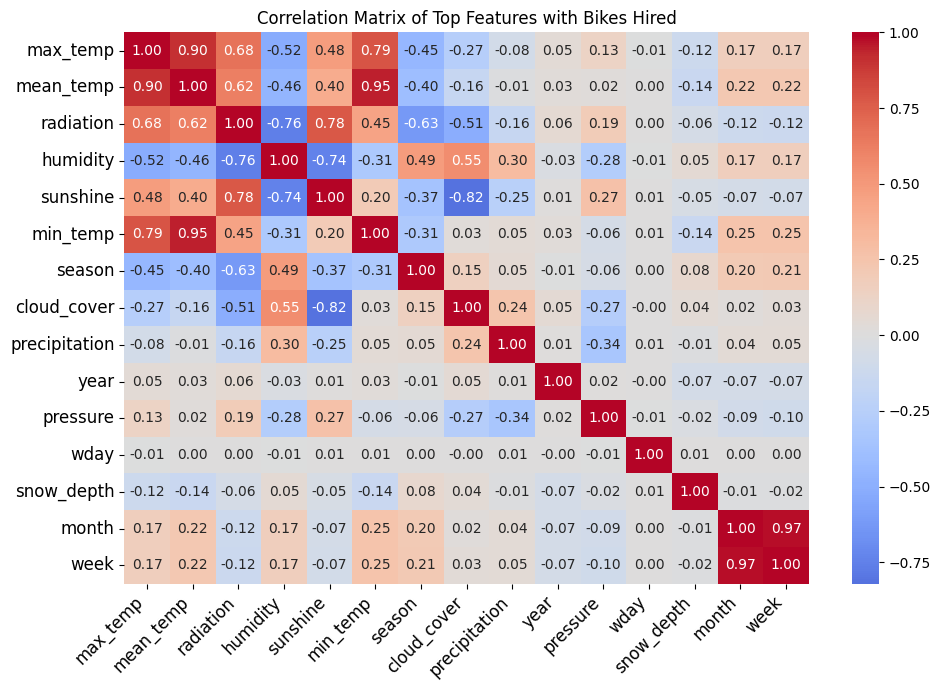

In [39]:
numeric_cols = london_bike_copy.select_dtypes(include=['number'])
features = [col for col in numeric_cols.columns if col != 'bikes_hired']
correlations = numeric_cols[features].corrwith(numeric_cols['bikes_hired']).abs().sort_values(ascending=False)
top_features = correlations.index.tolist()
corr_matrix = london_bike_copy[top_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top Features with Bikes Hired')
plt.xticks(rotation=45, ha='right', fontsize = 12)
plt.yticks(rotation=0, fontsize = 12)
plt.tight_layout()
plt.show()    

In [40]:
# Compute correlations of all numeric features with bikes_hired
numeric_cols = london_bike_copy.select_dtypes(include=["number"])
features = [col for col in numeric_cols.columns if col != "bikes_hired"]
correlations = numeric_cols[features].corrwith(numeric_cols["bikes_hired"]).sort_values(key=abs, ascending=False)

# Top 10 strongest correlations
top10 = correlations.head(10)
top10

max_temp         0.637578
mean_temp        0.625350
radiation        0.607836
humidity        -0.540679
sunshine         0.526755
min_temp         0.507744
season          -0.351968
cloud_cover     -0.349723
precipitation   -0.239453
year             0.236414
dtype: float64

After the analysing of the correlation matrix, we get the result, that the most important predictors, when its about bike hiring are the maximum temperature, the measure of radiation, humidity and sunshine, because they have the highest correlation value (either negative or positive), which means, that if, for example, the maximum temperature grows, the number of hired bikes also grow (positive correlation), and if the humidity grows, the number of hired bikes decline (negative correalation).

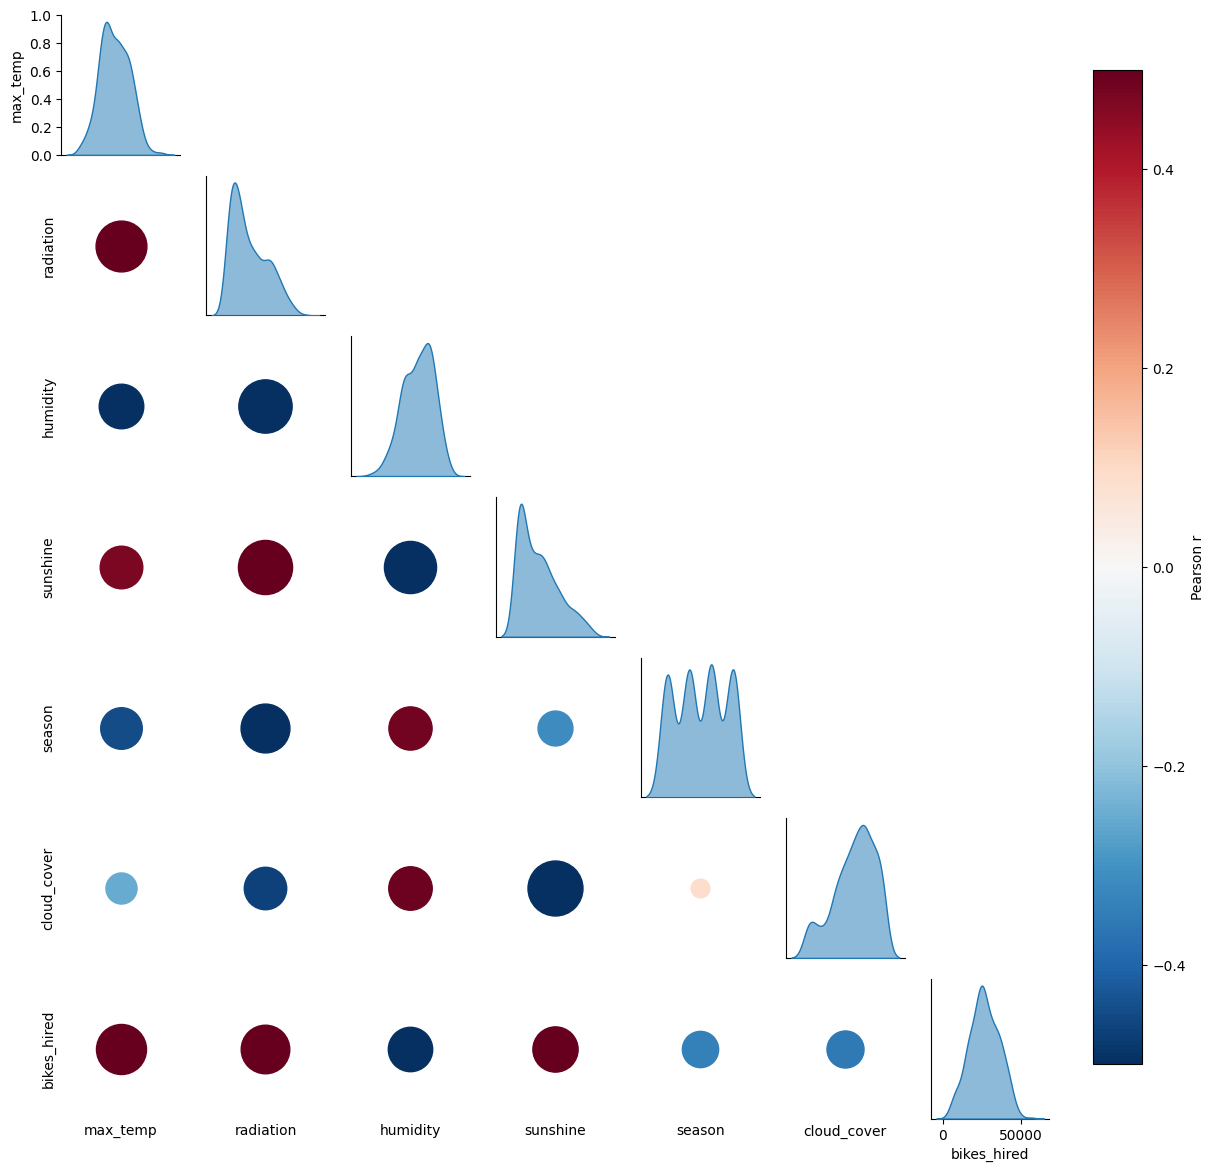

In [41]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import Normalize

vars_order = ['max_temp', 'radiation', 'humidity', 'sunshine', 'season', 'cloud_cover', 'bikes_hired']
df_plot = london_bike_copy.iloc[::10, :].copy()

# bubble plot for correlations
def corr_dot(x, y, **kws):
    ax = plt.gca()
    x, y = np.asarray(x, float), np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    r = 0.0 if m.sum() < 2 else np.corrcoef(x[m], y[m])[0, 1]
    # scatter bubble in middle of cell
    ax.scatter(0.5, 0.5, s=2000*abs(r), c=[[r]],
               cmap=kws["cmap"], norm=kws["norm"],
               transform=ax.transAxes)
    # clean ticks & spines but KEEP axis for labels
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values(): spine.set_visible(False)

# hide upper triangle completely
def hide_axis(*args, **kwargs):
    plt.gca().set_visible(False)

g = sns.PairGrid(df_plot, vars=vars_order, diag_sharey=False, height=1.7)
# diagonal: filled KDE
g.map_diag(
    sns.kdeplot,
    fill=True, alpha=0.5
)
norm = Normalize(-0.5, 0.5)
g.map_lower(corr_dot, norm=norm, cmap="RdBu_r")
g.map_upper(hide_axis)

# labels for lower axes
for ax, lab in zip(g.axes[-1, :], vars_order): ax.set_xlabel(lab)
for ax, lab in zip(g.axes[:, 0], vars_order):  ax.set_ylabel(lab)

# colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap="RdBu_r"); sm.set_array([])
g.fig.colorbar(sm, ax=g.axes, fraction=0.046, pad=0.04, label="Pearson r")

plt.show()


In [42]:
# Multiple linear regression model with several predictors

import statsmodels.formula.api as smf

model0_multiple = smf.ols('bikes_hired ~ max_temp + radiation + humidity + sunshine + season + cloud_cover', data=london_bike_copy).fit()
print(model0_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     775.0
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:18:30   Log-Likelihood:                -50643.
No. Observations:                4934   AIC:                         1.013e+05
Df Residuals:                    4927   BIC:                         1.013e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.062e+04   1441.566     14.305      

The model explains about 49% of the variation in bike rentals, with max temperature, radiation, sunshine (positive), and humidity (negative) showing strong and significant effects, while cloud cover is not significant. Overall, weather factors are strong drivers of bike demand, but the model should be refined for better reliability.

## Deliverables
A knitted HTML, one person per group to submit